In [69]:
import torchvision
import torch
import sys
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader

sys.path.append('..')

from src.datasets import OrandCarTestDataset

In [70]:
weights_path = "/home/rudy/Documents/cc7221/tarea3/src/weights/best_RetinaNet.pth"
data_path = "/home/rudy/Documents/cc7221/tarea3/data/orand-car-with-bbs"
device = "cpu"

### Load model

In [129]:
model = torchvision.models.detection.retinanet_resnet50_fpn(
    pretrained=False,
    num_classes=10,
    pretrained_backbone=False,
    score_thresh=0.5,
    nms_thresh=0.5,
    detections_per_img=300
)

model.load_state_dict(torch.load(weights_path, map_location="cpu"))
model.to(device)
model.eval();

### Load data and show an example

In [130]:
test_dataset = OrandCarTestDataset(data_path)

463 images were loaded successfully


In [131]:
idx = random.choice(list(range(len(test_dataset))))
image, label = test_dataset[idx]

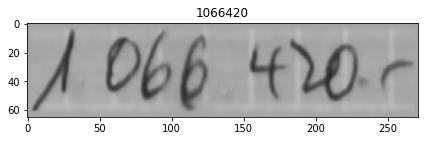

In [132]:
plt.title(label)
plt.imshow(image.permute(1, 2, 0));
plt.tight_layout()

### Visualize model predictions for one batch

Real label:  360000


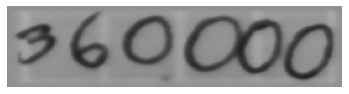

Real label:  325000


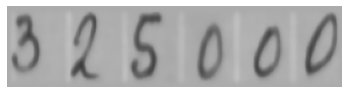

Real label:  1476476


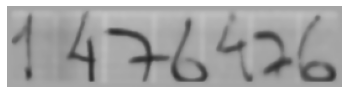

Real label:  500000


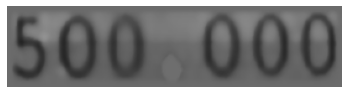

In [137]:
torch.cuda.empty_cache()
batch_size = 4
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)
for images, labels in test_loader:
    images = images.to(device)
    model_pred = model(images)
    images_list = list(images.chunk(batch_size))
    
    # show detections
    for single_image, real_label, detections in zip(images_list, labels, model_pred):
        print("Real label: ", real_label)
        
        single_image = (single_image * 255).type(torch.ByteTensor)
        boxes = detections['boxes']
        
        if len(boxes) > 0:
            print("Boxes detected!")
            pred_labels = [str(s) for s in list(detections['labels'].detach().cpu().numpy())]
            torchvision.utils.draw_bounding_boxes(single_image.squeeze(0), boxes, pred_labels)
        else:
            plt.imshow(single_image.squeeze(0).permute(1, 2, 0))
            plt.axis('off')
            plt.show()
    break

In [136]:
model_pred

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>),
  'scores': tensor([], grad_fn=<IndexBackward>),
  'labels': tensor([], dtype=torch.int64)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>),
  'scores': tensor([], grad_fn=<IndexBackward>),
  'labels': tensor([], dtype=torch.int64)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>),
  'scores': tensor([], grad_fn=<IndexBackward>),
  'labels': tensor([], dtype=torch.int64)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>),
  'scores': tensor([], grad_fn=<IndexBackward>),
  'labels': tensor([], dtype=torch.int64)}]